In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Read Data

In [2]:
Data = pd.read_csv('balance.csv')
del(Data['Unnamed: 0'])

# Understand Data

In [3]:
train, test = train_test_split(Data, test_size=0.20)

In [4]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
print("Number of Instances in train Data = %d"%len(train))

Number of Instances in train Data = 8462


In [7]:
print("Number of Instances in test Data = %d"%len(test))

Number of Instances in test Data = 2116


In [8]:
print("Number of Instances in Train Data have yes = %d"%len(train[train["y"]=="yes"]))

Number of Instances in Train Data have yes = 4225


In [9]:
print("Number of Instances in Train Data have no = %d"%len(train[train["y"]=="no"]))

Number of Instances in Train Data have no = 4237


In [10]:
print("Number of Instances in Test Data have yes = %d"%len(test[test["y"]=="yes"]))

Number of Instances in Test Data have yes = 1064


In [11]:
print("Number of Instances in Test Data have no = %d"%len(test[test["y"]=="no"]))

Number of Instances in Test Data have no = 1052


In [12]:
train[train["y"]=="yes"].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
5719,75,retired,married,secondary,no,3771,no,no,telephone,16,oct,186,1,183,1,failure,yes
8715,34,technician,married,tertiary,no,23076,no,no,cellular,26,may,243,2,35,6,other,yes
6962,31,unemployed,single,primary,no,406,no,no,cellular,4,feb,736,1,-1,0,unknown,yes
3395,26,technician,single,secondary,no,507,no,no,cellular,30,apr,380,1,-1,0,unknown,yes
1014,37,admin.,married,secondary,no,1314,yes,no,cellular,12,feb,118,4,210,3,failure,yes


In [13]:
train[train["y"]=="no"].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29,47,services,married,primary,no,1496,yes,no,unknown,16,may,211,2,-1,0,unknown,no
7323,24,self-employed,single,secondary,no,0,yes,no,unknown,6,may,278,1,-1,0,unknown,no
9795,51,blue-collar,married,primary,no,0,no,no,unknown,8,may,384,1,-1,0,unknown,no
2956,42,admin.,married,secondary,no,128,yes,no,unknown,13,may,190,1,-1,0,unknown,no
5285,53,technician,married,secondary,no,31,yes,no,unknown,16,may,90,2,-1,0,unknown,no


In [14]:
test[test["y"]=="yes"].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10353,36,services,divorced,secondary,yes,0,no,yes,cellular,15,jul,687,7,-1,0,unknown,yes
2838,68,retired,married,tertiary,no,2812,no,no,cellular,3,aug,392,4,181,3,success,yes
1517,25,student,single,secondary,no,3713,no,no,cellular,24,may,323,2,353,3,other,yes
5835,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes
4169,33,technician,married,secondary,no,133,no,no,cellular,12,nov,627,2,192,1,success,yes


In [15]:
test[test["y"]=="no"].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6773,20,services,single,secondary,no,-103,yes,no,unknown,13,may,180,1,-1,0,unknown,no
5221,56,management,married,tertiary,no,334,yes,no,unknown,15,may,127,2,-1,0,unknown,no
5882,55,services,married,unknown,no,-45,yes,no,unknown,16,may,764,7,-1,0,unknown,no
5053,43,admin.,married,secondary,no,616,yes,no,unknown,9,may,168,2,-1,0,unknown,no
6235,34,admin.,married,secondary,no,475,yes,no,unknown,7,may,559,1,-1,0,unknown,no


In [16]:
trainY = train.y.value_counts()
trainY

no     4237
yes    4225
Name: y, dtype: int64

Text(0.5, 1.0, "Total number of 'yes' & 'no' in train DataSet")

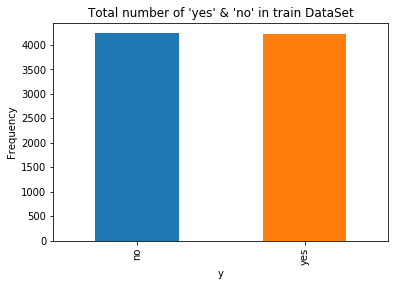

In [17]:
plot = trainY.plot(kind='bar',x='y')
plot.set_xlabel('y')
plot.set_ylabel('Frequency')
plot.set_title("Total number of 'yes' & 'no' in train DataSet")

In [18]:
testY = test.y.value_counts()

In [19]:
testY

yes    1064
no     1052
Name: y, dtype: int64

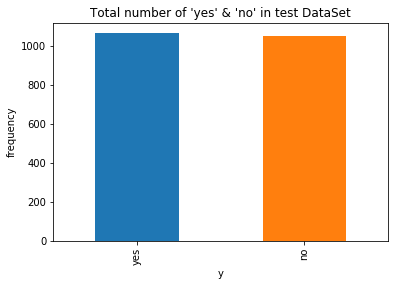

In [20]:
testPlot = testY.plot(kind='bar',x='y')
testPlot.set_xlabel('y')
testPlot.set_ylabel('frequency')
testPlot.set_title("Total number of 'yes' & 'no' in test DataSet");

Text(0.5, 1.0, 'number of ages and their Frequency')

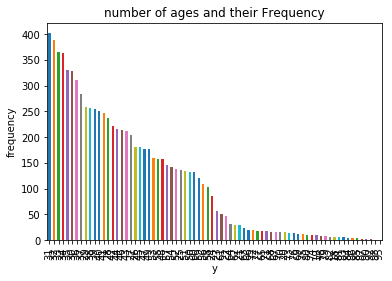

In [21]:
trainAge = train.age.value_counts()
trainAgePlot = trainAge.plot(kind='bar',x='y')
trainAgePlot.set_xlabel('y')
trainAgePlot.set_ylabel('frequency')
trainAgePlot.set_title('number of ages and their Frequency')

# Label Encoding for Train/Test Data

In [22]:
encoded_train = train.copy()
encoded_test = test.copy()

In [23]:
# object of label encode
labelEncoder = LabelEncoder();

In [24]:
encoded_train.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29,47,services,married,primary,no,1496,yes,no,unknown,16,may,211,2,-1,0,unknown,no
5719,75,retired,married,secondary,no,3771,no,no,telephone,16,oct,186,1,183,1,failure,yes
7323,24,self-employed,single,secondary,no,0,yes,no,unknown,6,may,278,1,-1,0,unknown,no
8715,34,technician,married,tertiary,no,23076,no,no,cellular,26,may,243,2,35,6,other,yes
6962,31,unemployed,single,primary,no,406,no,no,cellular,4,feb,736,1,-1,0,unknown,yes


In [25]:
encoded_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6773,20,services,single,secondary,no,-103,yes,no,unknown,13,may,180,1,-1,0,unknown,no
10353,36,services,divorced,secondary,yes,0,no,yes,cellular,15,jul,687,7,-1,0,unknown,yes
2838,68,retired,married,tertiary,no,2812,no,no,cellular,3,aug,392,4,181,3,success,yes
5221,56,management,married,tertiary,no,334,yes,no,unknown,15,may,127,2,-1,0,unknown,no
5882,55,services,married,unknown,no,-45,yes,no,unknown,16,may,764,7,-1,0,unknown,no


In [26]:
encoded_train.insert(17,"encoded",labelEncoder.fit_transform(encoded_train['job']))
encoded_test.insert(17,"encoded",labelEncoder.fit_transform(encoded_test['job']))
encoded_train['job'] = encoded_train['encoded']
encoded_test['job'] = encoded_test['encoded']
del(encoded_train['encoded'])
del(encoded_test['encoded'])
encoded_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29,47,7,married,primary,no,1496,yes,no,unknown,16,may,211,2,-1,0,unknown,no
5719,75,5,married,secondary,no,3771,no,no,telephone,16,oct,186,1,183,1,failure,yes
7323,24,6,single,secondary,no,0,yes,no,unknown,6,may,278,1,-1,0,unknown,no
8715,34,9,married,tertiary,no,23076,no,no,cellular,26,may,243,2,35,6,other,yes
6962,31,10,single,primary,no,406,no,no,cellular,4,feb,736,1,-1,0,unknown,yes


In [27]:
encoded_train.insert(17,"encoded",labelEncoder.fit_transform(encoded_train['education']))
encoded_test.insert(17,"encoded",labelEncoder.fit_transform(encoded_test['education']))
encoded_train['education'] = encoded_train['encoded']
encoded_test['education'] = encoded_test['encoded']
del(encoded_train['encoded'])
del(encoded_test['encoded'])
encoded_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29,47,7,married,0,no,1496,yes,no,unknown,16,may,211,2,-1,0,unknown,no
5719,75,5,married,1,no,3771,no,no,telephone,16,oct,186,1,183,1,failure,yes
7323,24,6,single,1,no,0,yes,no,unknown,6,may,278,1,-1,0,unknown,no
8715,34,9,married,2,no,23076,no,no,cellular,26,may,243,2,35,6,other,yes
6962,31,10,single,0,no,406,no,no,cellular,4,feb,736,1,-1,0,unknown,yes


In [28]:
encoded_train.insert(17,"encoded",labelEncoder.fit_transform(encoded_train['marital']))
encoded_test.insert(17,"encoded",labelEncoder.fit_transform(encoded_test['marital']))
encoded_train['marital'] = encoded_train['encoded']
encoded_test['marital'] = encoded_test['encoded']
del(encoded_train['encoded'])
del(encoded_test['encoded'])
encoded_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29,47,7,1,0,no,1496,yes,no,unknown,16,may,211,2,-1,0,unknown,no
5719,75,5,1,1,no,3771,no,no,telephone,16,oct,186,1,183,1,failure,yes
7323,24,6,2,1,no,0,yes,no,unknown,6,may,278,1,-1,0,unknown,no
8715,34,9,1,2,no,23076,no,no,cellular,26,may,243,2,35,6,other,yes
6962,31,10,2,0,no,406,no,no,cellular,4,feb,736,1,-1,0,unknown,yes


In [29]:
encoded_train.insert(17,"encoded",labelEncoder.fit_transform(encoded_train['default']))
encoded_test.insert(17,"encoded",labelEncoder.fit_transform(encoded_test['default']))
encoded_train['default'] = encoded_train['encoded']
encoded_test['default'] = encoded_test['encoded']
del(encoded_train['encoded'])
del(encoded_test['encoded'])
encoded_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29,47,7,1,0,0,1496,yes,no,unknown,16,may,211,2,-1,0,unknown,no
5719,75,5,1,1,0,3771,no,no,telephone,16,oct,186,1,183,1,failure,yes
7323,24,6,2,1,0,0,yes,no,unknown,6,may,278,1,-1,0,unknown,no
8715,34,9,1,2,0,23076,no,no,cellular,26,may,243,2,35,6,other,yes
6962,31,10,2,0,0,406,no,no,cellular,4,feb,736,1,-1,0,unknown,yes


In [30]:
encoded_train.insert(17,"encoded",labelEncoder.fit_transform(encoded_train['housing']))
encoded_test.insert(17,"encoded",labelEncoder.fit_transform(encoded_test['housing']))
encoded_train['housing'] = encoded_train['encoded']
encoded_test['housing'] = encoded_test['encoded']
del(encoded_train['encoded'])
del(encoded_test['encoded'])
encoded_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29,47,7,1,0,0,1496,1,no,unknown,16,may,211,2,-1,0,unknown,no
5719,75,5,1,1,0,3771,0,no,telephone,16,oct,186,1,183,1,failure,yes
7323,24,6,2,1,0,0,1,no,unknown,6,may,278,1,-1,0,unknown,no
8715,34,9,1,2,0,23076,0,no,cellular,26,may,243,2,35,6,other,yes
6962,31,10,2,0,0,406,0,no,cellular,4,feb,736,1,-1,0,unknown,yes


In [31]:
encoded_train.insert(17,"encoded",labelEncoder.fit_transform(encoded_train['loan']))
encoded_test.insert(17,"encoded",labelEncoder.fit_transform(encoded_test['loan']))
encoded_train['loan'] = encoded_train['encoded']
encoded_test['loan'] = encoded_test['encoded']
del(encoded_train['encoded'])
del(encoded_test['encoded'])
encoded_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29,47,7,1,0,0,1496,1,0,unknown,16,may,211,2,-1,0,unknown,no
5719,75,5,1,1,0,3771,0,0,telephone,16,oct,186,1,183,1,failure,yes
7323,24,6,2,1,0,0,1,0,unknown,6,may,278,1,-1,0,unknown,no
8715,34,9,1,2,0,23076,0,0,cellular,26,may,243,2,35,6,other,yes
6962,31,10,2,0,0,406,0,0,cellular,4,feb,736,1,-1,0,unknown,yes


In [32]:
encoded_train.insert(17,"encoded",labelEncoder.fit_transform(encoded_train['contact']))
encoded_test.insert(17,"encoded",labelEncoder.fit_transform(encoded_test['contact']))
encoded_train['contact'] = encoded_train['encoded']
encoded_test['contact'] = encoded_test['encoded']
del(encoded_train['encoded'])
del(encoded_test['encoded'])
encoded_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29,47,7,1,0,0,1496,1,0,2,16,may,211,2,-1,0,unknown,no
5719,75,5,1,1,0,3771,0,0,1,16,oct,186,1,183,1,failure,yes
7323,24,6,2,1,0,0,1,0,2,6,may,278,1,-1,0,unknown,no
8715,34,9,1,2,0,23076,0,0,0,26,may,243,2,35,6,other,yes
6962,31,10,2,0,0,406,0,0,0,4,feb,736,1,-1,0,unknown,yes


In [33]:
encoded_train.insert(17,"encoded",labelEncoder.fit_transform(encoded_train['month']))
encoded_test.insert(17,"encoded",labelEncoder.fit_transform(encoded_test['month']))
encoded_train['month'] = encoded_train['encoded']
encoded_test['month'] = encoded_test['encoded']
del(encoded_train['encoded'])
del(encoded_test['encoded'])
encoded_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29,47,7,1,0,0,1496,1,0,2,16,8,211,2,-1,0,unknown,no
5719,75,5,1,1,0,3771,0,0,1,16,10,186,1,183,1,failure,yes
7323,24,6,2,1,0,0,1,0,2,6,8,278,1,-1,0,unknown,no
8715,34,9,1,2,0,23076,0,0,0,26,8,243,2,35,6,other,yes
6962,31,10,2,0,0,406,0,0,0,4,3,736,1,-1,0,unknown,yes


In [34]:
encoded_train.insert(17,"encoded",labelEncoder.fit_transform(encoded_train['poutcome']))
encoded_test.insert(17,"encoded",labelEncoder.fit_transform(encoded_test['poutcome']))
encoded_train['poutcome'] = encoded_train['encoded']
encoded_test['poutcome'] = encoded_test['encoded']
del(encoded_train['encoded'])
del(encoded_test['encoded'])
encoded_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29,47,7,1,0,0,1496,1,0,2,16,8,211,2,-1,0,3,no
5719,75,5,1,1,0,3771,0,0,1,16,10,186,1,183,1,0,yes
7323,24,6,2,1,0,0,1,0,2,6,8,278,1,-1,0,3,no
8715,34,9,1,2,0,23076,0,0,0,26,8,243,2,35,6,1,yes
6962,31,10,2,0,0,406,0,0,0,4,3,736,1,-1,0,3,yes


In [35]:
cls_lblencoder = LabelEncoder()
cls_lblencoder.fit(encoded_train['y'])
encoded_train.insert(17,"encoded",cls_lblencoder.transform(encoded_train['y']))
encoded_test.insert(17,"encoded",cls_lblencoder.transform(encoded_test['y']))
encoded_train['y'] = encoded_train['encoded']
encoded_test['y'] = encoded_test['encoded']
del(encoded_train['encoded'])
del(encoded_test['encoded'])
encoded_train.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2471,31,9,1,1,0,1868,1,0,2,9,8,213,2,-1,0,3,0
10137,34,4,1,2,0,76,0,0,2,8,8,335,9,-1,0,3,0
4574,32,1,1,1,1,-53,1,0,0,16,0,648,1,272,1,1,1
1510,48,9,1,0,0,235,0,0,0,9,11,386,2,191,3,2,1
10456,38,2,2,1,0,2543,0,0,0,11,9,357,3,93,5,2,1


# Computing cross-validated metrics

In [36]:
trainX = encoded_train.values[:,:-1]
trainY = encoded_train["y"].values
testX = encoded_test.values[:,:-1]
testY = encoded_test["y"].values

In [37]:
display(trainX)
display(trainY)
display(testX)
display(testY)

array([[ 47,   7,   1, ...,  -1,   0,   3],
       [ 75,   5,   1, ..., 183,   1,   0],
       [ 24,   6,   2, ...,  -1,   0,   3],
       ...,
       [ 32,   1,   1, ..., 272,   1,   1],
       [ 48,   9,   1, ..., 191,   3,   2],
       [ 38,   2,   2, ...,  93,   5,   2]])

array([0, 1, 0, ..., 1, 1, 1])

array([[ 20,   7,   2, ...,  -1,   0,   3],
       [ 36,   7,   0, ...,  -1,   0,   3],
       [ 68,   5,   1, ..., 181,   3,   2],
       ...,
       [ 34,   0,   1, ...,  -1,   0,   3],
       [ 47,   1,   1, ...,  -1,   0,   3],
       [ 38,   7,   1, ..., 176,   1,   2]])

array([0, 1, 1, ..., 0, 0, 1])

In [38]:
logisticRegression =  LogisticRegression();
#solver='lbfgs'
logisticRegression.fit(trainX,trainY)

/home/usman/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
LRScores = cross_val_score(logisticRegression,trainX ,trainY, cv=10,scoring='accuracy')

/home/usman/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/usman/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/usman/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/usman/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/usman/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

In [40]:
LRScores.mean()

0.9702192996211743

In [41]:
PLRScore = logisticRegression.score(testX,testY)

In [42]:
LRScore = logisticRegression.score(testX,testY)
print("Accuracy Score : %f"%(PLRScore))

Accuracy Score : 0.963138


In [43]:
bernoulliNB =BernoulliNB()
bernoulliNB.fit(trainX,trainY)
BNBScores = cross_val_score(bernoulliNB,trainX ,trainY, cv=10,scoring='accuracy')
BNBScore = bernoulliNB.score(testX,testY)
print("Accuracy Score : %f"%(BNBScore))
print("Accuracy Average Score of K Fold : %f"%(BNBScores.mean()))

Accuracy Score : 0.928166
Accuracy Average Score of K Fold : 0.930275


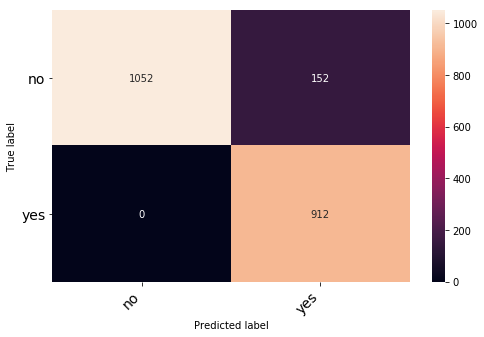

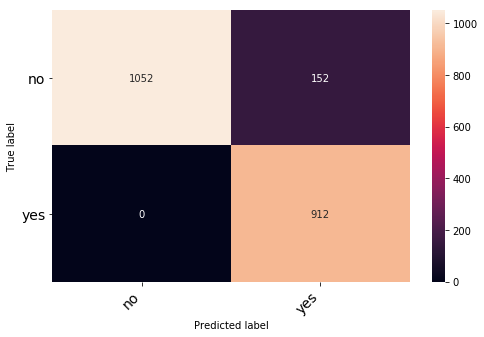

In [47]:
bnb_perdiction = bernoulliNB.predict(testX)

bnb_con_matrix = confusion_matrix(
    cls_lblencoder.inverse_transform(bnb_perdiction),
    cls_lblencoder.inverse_transform(testY),
    train['y'].unique()
)
bnb_con_matrix
print_confusion_matrix(bnb_con_matrix,train['y'].unique())

In [46]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier.fit(trainX,trainY)
RFCScores = cross_val_score(randomForestClassifier,trainX ,trainY, cv=10,scoring='accuracy')
RFCScore = randomForestClassifier.score(testX,testY)
print("Accuracy Score : %f"%(RFCScore))
print("Accuracy Average Score of K Fold : %f"%(RFCScores.mean()))

Accuracy Score : 0.979206
Accuracy Average Score of K Fold : 0.983925


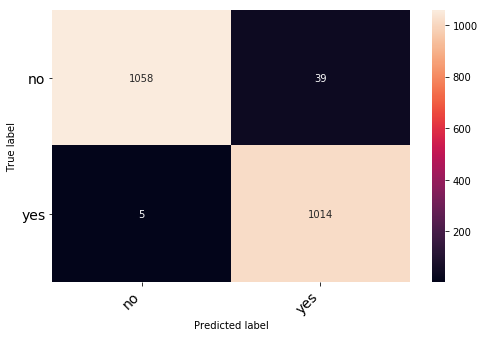

In [102]:
rfc_perdiction = randomForestClassifier.predict(testX)

rfc_con_matrix = confusion_matrix(
    cls_lblencoder.inverse_transform(rfc_perdiction),
    cls_lblencoder.inverse_transform(testY),
    train['y'].unique()
)
print_confusion_matrix(rfc_con_matrix,train['y'].unique())

In [47]:
linearSVC=LinearSVC()
linearSVC.fit(trainX,trainY)
LSVCScores = cross_val_score(linearSVC,trainX ,trainY, cv=10,scoring='accuracy')
LSVCScore = linearSVC.score(testX,testY)
print("Accuracy Score : %f"%(LSVCScore))
print("Accuracy Average Score of K Fold : %f"%(LSVCScores.mean()))

Accuracy Score : 0.912571
Accuracy Average Score of K Fold : 0.912318


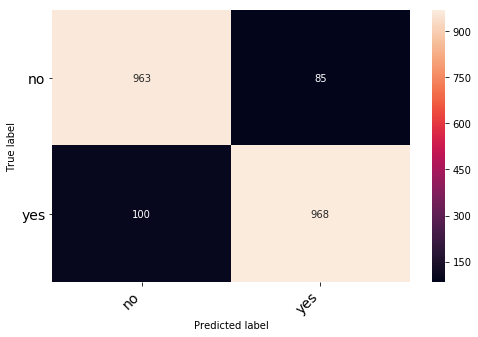

In [103]:
lsvc_perdiction = linearSVC.predict(testX)

lsvc_con_matrix = confusion_matrix(
    cls_lblencoder.inverse_transform(lsvc_perdiction),
    cls_lblencoder.inverse_transform(testY),
    train['y'].unique()
)
print_confusion_matrix(lsvc_con_matrix,train['y'].unique())

In [46]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (8,5), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [105]:
predictionModals = {
    'accuracy': [LRScore, RFCScore, LSVCScore, BNBScore],
    'Model': ['LogisticRegression', 'RandomForestClassifier', 'LinearSVC', 'BernoulliNB']

}
prodictionModelDF = pd.DataFrame(predictionModals, columns=['accuracy', 'Model'])
print("detail performance of all parameters : ")
print(prodictionModelDF)

print("Best model ")
print(prodictionModelDF.iloc[1:2,:])

detail performance of all parameters : 
   accuracy                   Model
0  0.964083      LogisticRegression
1  0.979206  RandomForestClassifier
2  0.912571               LinearSVC
3  0.929112             BernoulliNB
Best model 
   accuracy                   Model
1  0.979206  RandomForestClassifier


In [110]:

combineData = pd.concat([encoded_train,encoded_test])
CDX = combineData.values[:,:-1]
CDY = combineData["y"].values
randomForestClassifier = RandomForestClassifier()
randomForestClassifier.fit(CDX,CDY)
print("parameters and their values")
print(randomForestClassifier)

# save the model
pickle.dump(randomForestClassifier,open('creditRiskModel','wb'))

parameters and their values
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


# predict unseen example

In [134]:
unseen_example = pd.read_csv("unseen.csv")
unseen_example

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,43201,66,housemaid,divorced,primary,no,3701,no,no,telephone,3,mar,834,1,-1,0,unknown,yes


In [135]:
unseen_df = 

SyntaxError: invalid syntax (<ipython-input-135-b12531067941>, line 1)

In [136]:
unseenLen = LabelEncoder()
unseen_example.insert(17,"encoded",unseenLen.fit_transform(unseen_example['education']))
unseen_example['education'] = unseen_example['encoded']
del(unseen_example['encoded'])
unseen_example.insert(17,"encoded",unseenLen.fit_transform(unseen_example['job']))

unseen_example['job'] = unseen_example['encoded']

del(unseen_example['encoded'])


unseen_example.insert(17,"encoded",unseenLen.fit_transform(unseen_example['marital']))

unseen_example['marital'] = unseen_example['encoded']

del(unseen_example['encoded'])

unseen_example.insert(17,"encoded",unseenLen.fit_transform(unseen_example['default']))

unseen_example['default'] = unseen_example['encoded']

del(unseen_example['encoded'])

unseen_example.insert(17,"encoded",unseenLen.fit_transform(unseen_example['housing']))

unseen_example['housing'] = unseen_example['encoded']

del(unseen_example['encoded'])

unseen_example.insert(17,"encoded",unseenLen.fit_transform(unseen_example['loan']))

unseen_example['loan'] = unseen_example['encoded']

del(unseen_example['encoded'])

unseen_example.insert(17,"encoded",unseenLen.fit_transform(unseen_example['contact']))

unseen_example['contact'] = unseen_example['encoded']

del(unseen_example['encoded'])
unseen_example.insert(17,"encoded",unseenLen.fit_transform(unseen_example['month']))

unseen_example['month'] = unseen_example['encoded']

del(unseen_example['encoded'])

unseen_example.insert(17,"encoded",unseenLen.fit_transform(unseen_example['poutcome']))

unseen_example['poutcome'] = unseen_example['encoded']

del(unseen_example['encoded'])

del(unseen_example['y'])




In [137]:
del(unseen_example['Unnamed: 0'])
unseen_example

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,66,0,0,0,0,3701,0,0,0,3,0,834,1,-1,0,0


In [138]:
best_saved_model = pickle.load(open('creditRiskModel','rb'))

In [139]:
best_saved_model.predict(unseen_example.values)

array([1])